<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-01-27 12:47:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  62.3MB/s    in 2.4s    

2025-01-27 12:47:21 (62.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


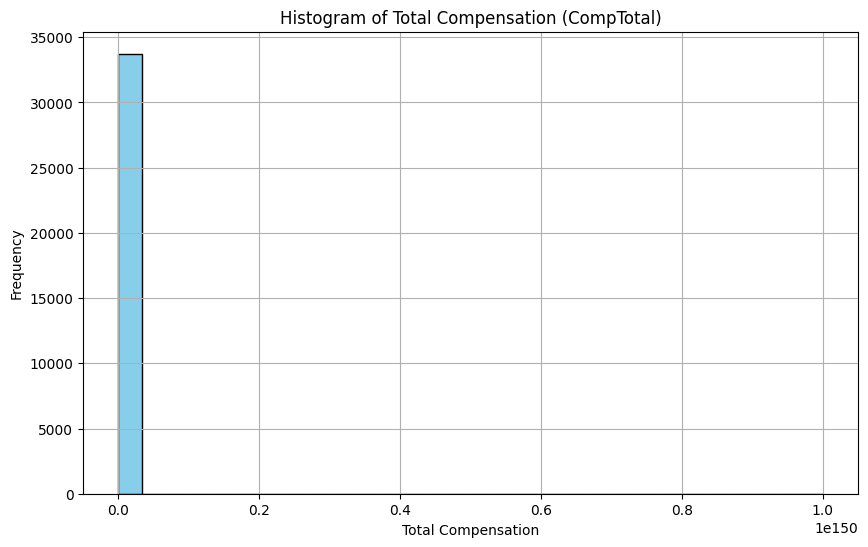

In [10]:
## Write your code here

df = pd.read_sql_query('SELECT CompTotal FROM main', conn)

# Close the connection
conn.close()

# Plot the histogram
plt.figure(figsize=(10,6))
plt.hist(df['CompTotal'], bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Box Plots**

Plot a box plot of Age.


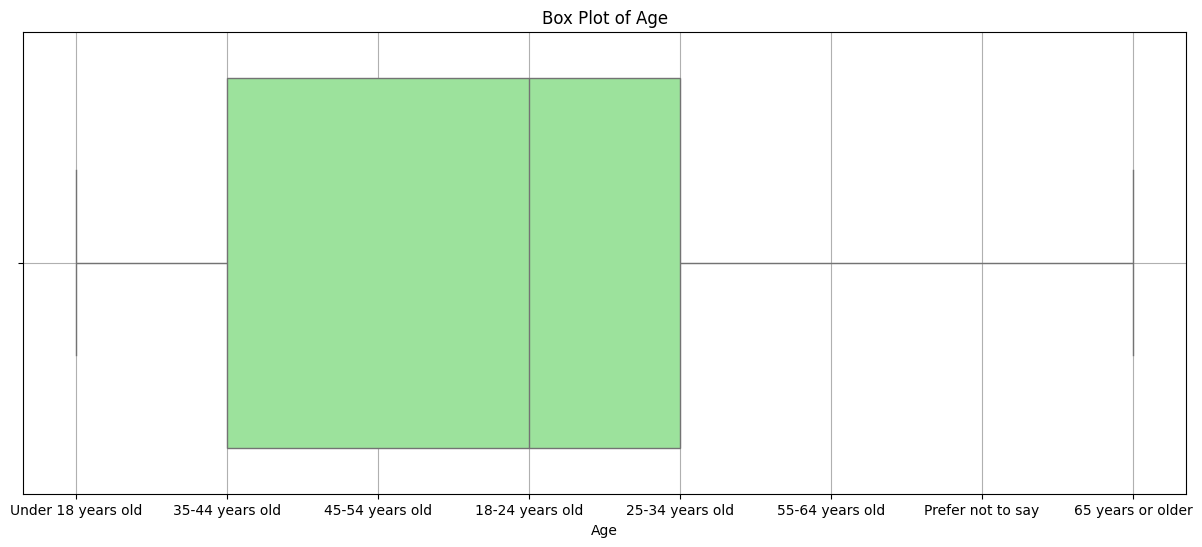

In [15]:
## Write your code here

!pip install seaborn
import seaborn as sns

conn = sqlite3.connect('survey-data.sqlite')

# Query the data
df = pd.read_sql_query('SELECT Age FROM main', conn)

# No need to close connection yet

# Plot the box plot using seaborn
plt.figure(figsize=(15, 6))
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)

# Close the connection after plotting
conn.close()

# Show the plot
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


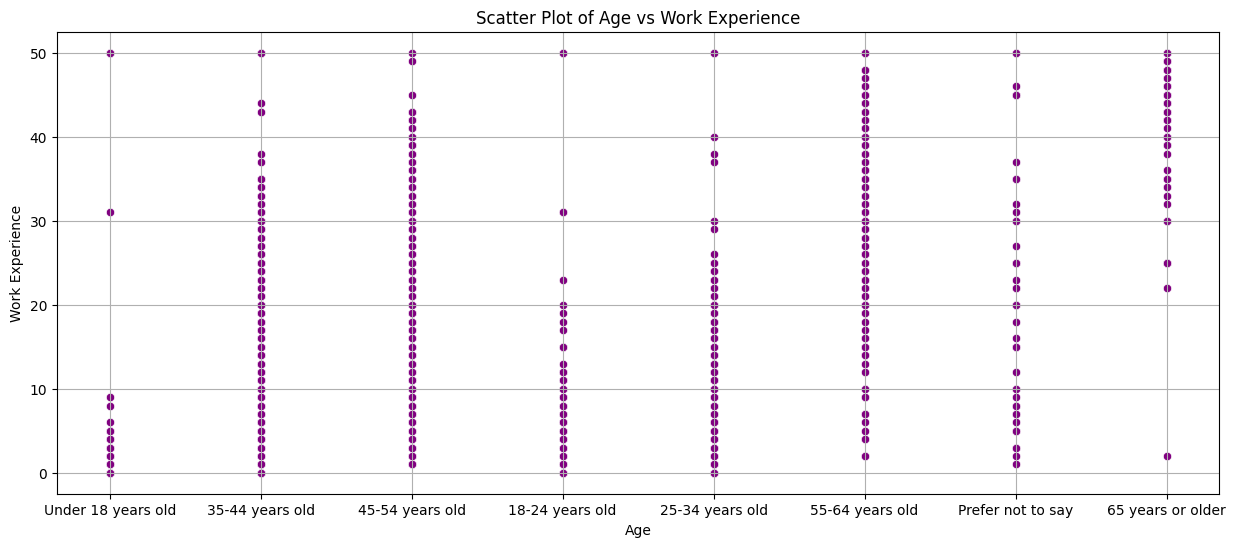

In [17]:
## Write your code here

conn = sqlite3.connect('survey-data.sqlite')

# Query the data for both Age and WorkExp
df = pd.read_sql_query('SELECT Age, WorkExp FROM main', conn)

# Close the connection after fetching the data
conn.close()

# Plot the scatter plot using seaborn
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Age', y='WorkExp', data=df, color='purple')
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.grid(True)

# Show the plot
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [25]:
## Write your code here

conn = sqlite3.connect('survey-data.sqlite')

df = pd.read_sql_query('SELECT TimeSearching, Frustration, Age FROM main', conn)

# Close the connection after fetching the data
conn.close()

# Print the first few rows to verify data
print("First few rows of data:")
print(df.head())

# Check the raw values in 'TimeSearching' and 'Frustration' columns
print("\nRaw values in 'TimeSearching':")
print(df['TimeSearching'].unique())

print("\nRaw values in 'Frustration':")
print(df['Frustration'].unique())

# Manually clean invalid values like "None", "N/A" in 'TimeSearching' and 'Frustration' columns
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['Frustration'] = pd.to_numeric(df['Frustration'], errors='coerce')

# Manually clean any specific string entries that aren't valid numbers
df['TimeSearching'] = df['TimeSearching'].replace({'None': pd.NA, 'N/A': pd.NA, '': pd.NA})
df['Frustration'] = df['Frustration'].replace({'None': pd.NA, 'N/A': pd.NA, '': pd.NA})

# Map Age categories to numeric values (midpoint of the age ranges)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}

# Convert Age to numeric values using the mapping
df['Age'] = df['Age'].map(age_mapping)

# Print data after conversion to check
print("\nData after conversion:")
print(df.head())

# Drop rows with missing or invalid data in any of the relevant columns
df = df.dropna(subset=['Age', 'TimeSearching', 'Frustration'])

# Check if there's any data left for plotting
if df.empty:
    print("No valid data to plot!")
else:
    # Normalize the Age data to avoid excessively large bubble sizes
    # Scale Age to a reasonable range for bubble sizes
    age_scaled = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min()) * 1000  # Scale to 0-1000

    # Print the scaled age values to ensure they are in a reasonable range
    print("\nScaled Age values (bubble sizes):")
    print(age_scaled.head())


First few rows of data:
  TimeSearching Frustration                 Age
0          None        None  Under 18 years old
1          None        None     35-44 years old
2          None        None     45-54 years old
3          None        None     18-24 years old
4          None        None     18-24 years old

Raw values in 'TimeSearching':
[None '30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']

Raw values in 'Frustration':
[None
 'Amount of technical debt;Number of software tools in use;Tracking my work;Showing my contributions'
 'Amount of technical debt;Complexity of tech stack for deployment'
 'Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build;Maintaining security of code being produced'
 'Amount of technical debt;Tracking my work;Complexity of tech stack for build;Patching/updating core components;Maintaining security of systems/platforms used in work;Reliab

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


First few rows of data:
       DatabaseWantToWorkWith
0                        None
1                  PostgreSQL
2  Firebase Realtime Database
3    MongoDB;MySQL;PostgreSQL
4           PostgreSQL;SQLite


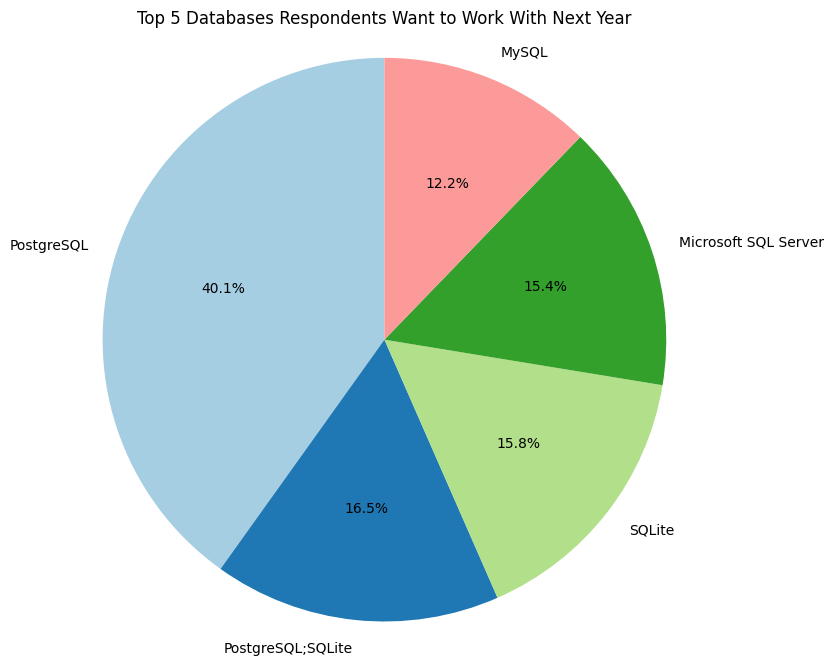

In [26]:
## Write your code here

conn = sqlite3.connect('survey-data.sqlite')

# Query the data for DatabaseWantToWorkWith column
df = pd.read_sql_query('SELECT DatabaseWantToWorkWith FROM main', conn)

# Close the connection after fetching the data
conn.close()

# Print the first few rows to verify data
print("First few rows of data:")
print(df.head())

# Count the occurrences of each unique database in DatabaseWantToWorkWith
database_counts = df['DatabaseWantToWorkWith'].value_counts()

# Get the top 5 databases
top_5_databases = database_counts.head(5)

# Plot the pie chart for the top 5 databases
plt.figure(figsize=(8, 8))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Databases Respondents Want to Work With Next Year')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the pie chart
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


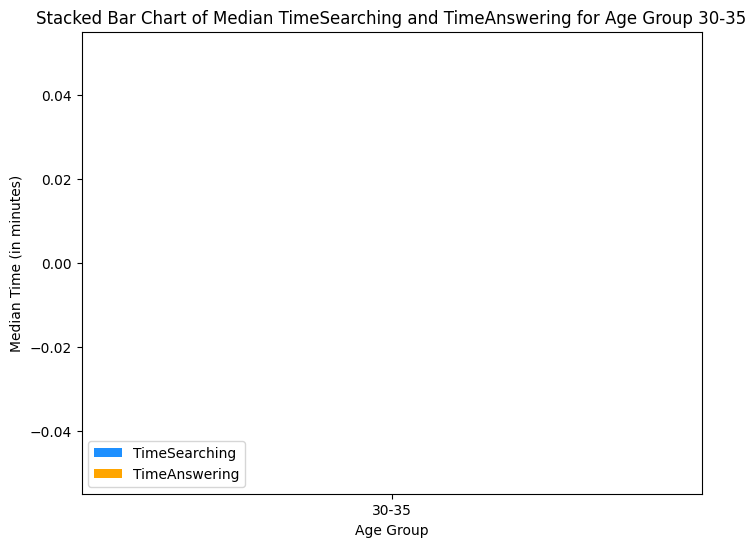

In [28]:
## Write your code here

conn = sqlite3.connect('survey-data.sqlite')

df = pd.read_sql_query('SELECT Age, TimeSearching, TimeAnswering FROM main', conn)

# Close the connection after fetching the data
conn.close()

# Map Age categories to numeric values (midpoint of the age ranges)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}

# Convert Age to numeric values using the mapping
df['Age'] = df['Age'].map(age_mapping)

# Filter the data for the age group 30-35 (inclusive)
df_filtered = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Convert TimeSearching and TimeAnswering to numeric, forcing errors to NaN
df_filtered['TimeSearching'] = pd.to_numeric(df_filtered['TimeSearching'], errors='coerce')
df_filtered['TimeAnswering'] = pd.to_numeric(df_filtered['TimeAnswering'], errors='coerce')

# Calculate the median of TimeSearching and TimeAnswering for the selected age group
median_values = df_filtered[['TimeSearching', 'TimeAnswering']].median()

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))

# Plotting the stacked bar chart
plt.bar(['30-35'], median_values['TimeSearching'], label='TimeSearching', color='dodgerblue')
plt.bar(['30-35'], median_values['TimeAnswering'], label='TimeAnswering', color='orange', bottom=median_values['TimeSearching'])

# Adding titles and labels
plt.title('Stacked Bar Chart of Median TimeSearching and TimeAnswering for Age Group 30-35')
plt.xlabel('Age Group')
plt.ylabel('Median Time (in minutes)')
plt.legend()

# Show the plot
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


/tmp/ipykernel_555/3842699364.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CompTotal'] = pd.to_numeric(df_filtered['CompTotal'], errors='coerce')


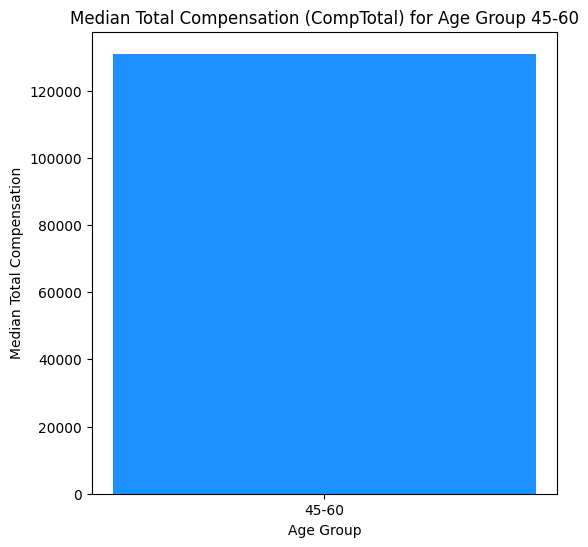

In [29]:
## Write your code here

conn = sqlite3.connect('survey-data.sqlite')

# Query the data for Age and CompTotal columns
df = pd.read_sql_query('SELECT Age, CompTotal FROM main', conn)

# Close the connection after fetching the data
conn.close()

# Map Age categories to numeric values (midpoint of the age ranges)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}

# Convert Age to numeric values using the mapping
df['Age'] = df['Age'].map(age_mapping)

# Filter the data for the age group 45 to 60 (inclusive)
df_filtered = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Convert CompTotal to numeric, forcing errors to NaN
df_filtered['CompTotal'] = pd.to_numeric(df_filtered['CompTotal'], errors='coerce')

# Calculate the median of CompTotal for the selected age group
median_comp_total = df_filtered['CompTotal'].median()

# Plot the median CompTotal as a bar plot
plt.figure(figsize=(6, 6))
plt.bar(['45-60'], [median_comp_total], color='dodgerblue')

# Adding titles and labels
plt.title('Median Total Compensation (CompTotal) for Age Group 45-60')
plt.xlabel('Age Group')
plt.ylabel('Median Total Compensation')

# Show the plot
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


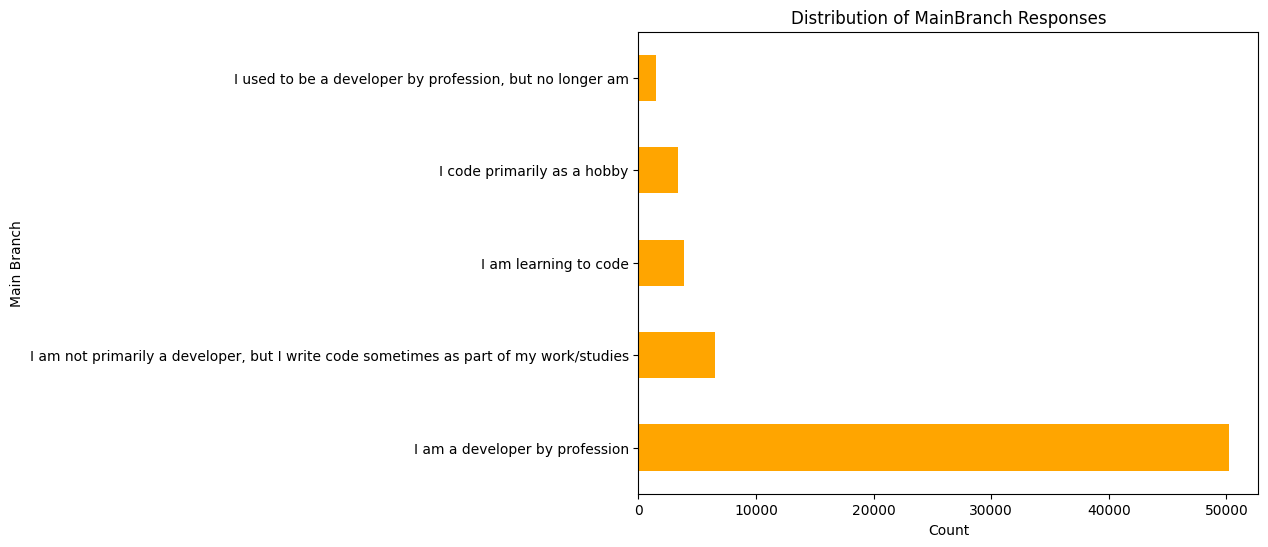

In [35]:
## Write your code here

conn = sqlite3.connect('survey-data.sqlite')

# Query the data for the MainBranch column
df = pd.read_sql_query('SELECT MainBranch FROM main', conn)

# Close the connection after fetching the data
conn.close()

# Count the occurrences of each unique value in the MainBranch column
main_branch_counts = df['MainBranch'].value_counts()

# Plot the horizontal bar chart
plt.figure(figsize=(8, 6))
main_branch_counts.plot(kind='barh', color='orange')

# Adding titles and labels
plt.title('Distribution of MainBranch Responses')
plt.xlabel('Count')
plt.ylabel('Main Branch')

# Show the plot
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
